## Plots for UTLS in different backgrounds, LMDZ-INCA

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
#import xesmf as xe
import glob
from matplotlib import rcParams

In [2]:
rcParams['font.size'] = 18

In [3]:
#define file locations
file_loc1 = '/div/nac/users/zofias/ACACIA/model_data/output/LMDZ-INCA/'
#file_loc2 = '/div/pdo/mariantl/ACACIA_AVIATE/input4rf/EMAC/aerosol_EMAC/'

#***change filename here***
filelist = sorted(glob.glob(f'{file_loc1}*C1_*'))
#filename = 'MOZART3_C1_SSP3'
#filename2 = 'aerosols_EMAC_A1'
exp_labs = [lab[63:-3] for lab in filelist]

In [4]:
#import data
ds_SSP1 = xr.open_dataset(filelist[0])
ds_SSP3 = xr.open_dataset(filelist[1])
ds_SSP3_SSP1BG = xr.open_dataset(filelist[2])
ds_SSP1_SSP3BG = xr.open_dataset(filelist[3])


ds_diff = ds_SSP1 - ds_SSP3
ds_diff_SSP1 = ds_SSP1 - ds_SSP1_SSP3BG
ds_diff_SSP3 = ds_SSP3_SSP1BG - ds_SSP3

### Zonal mean plots

Text(0.5, 0.98, 'SSP1 ems: SSP1BG - SSP3BG (ppb)')

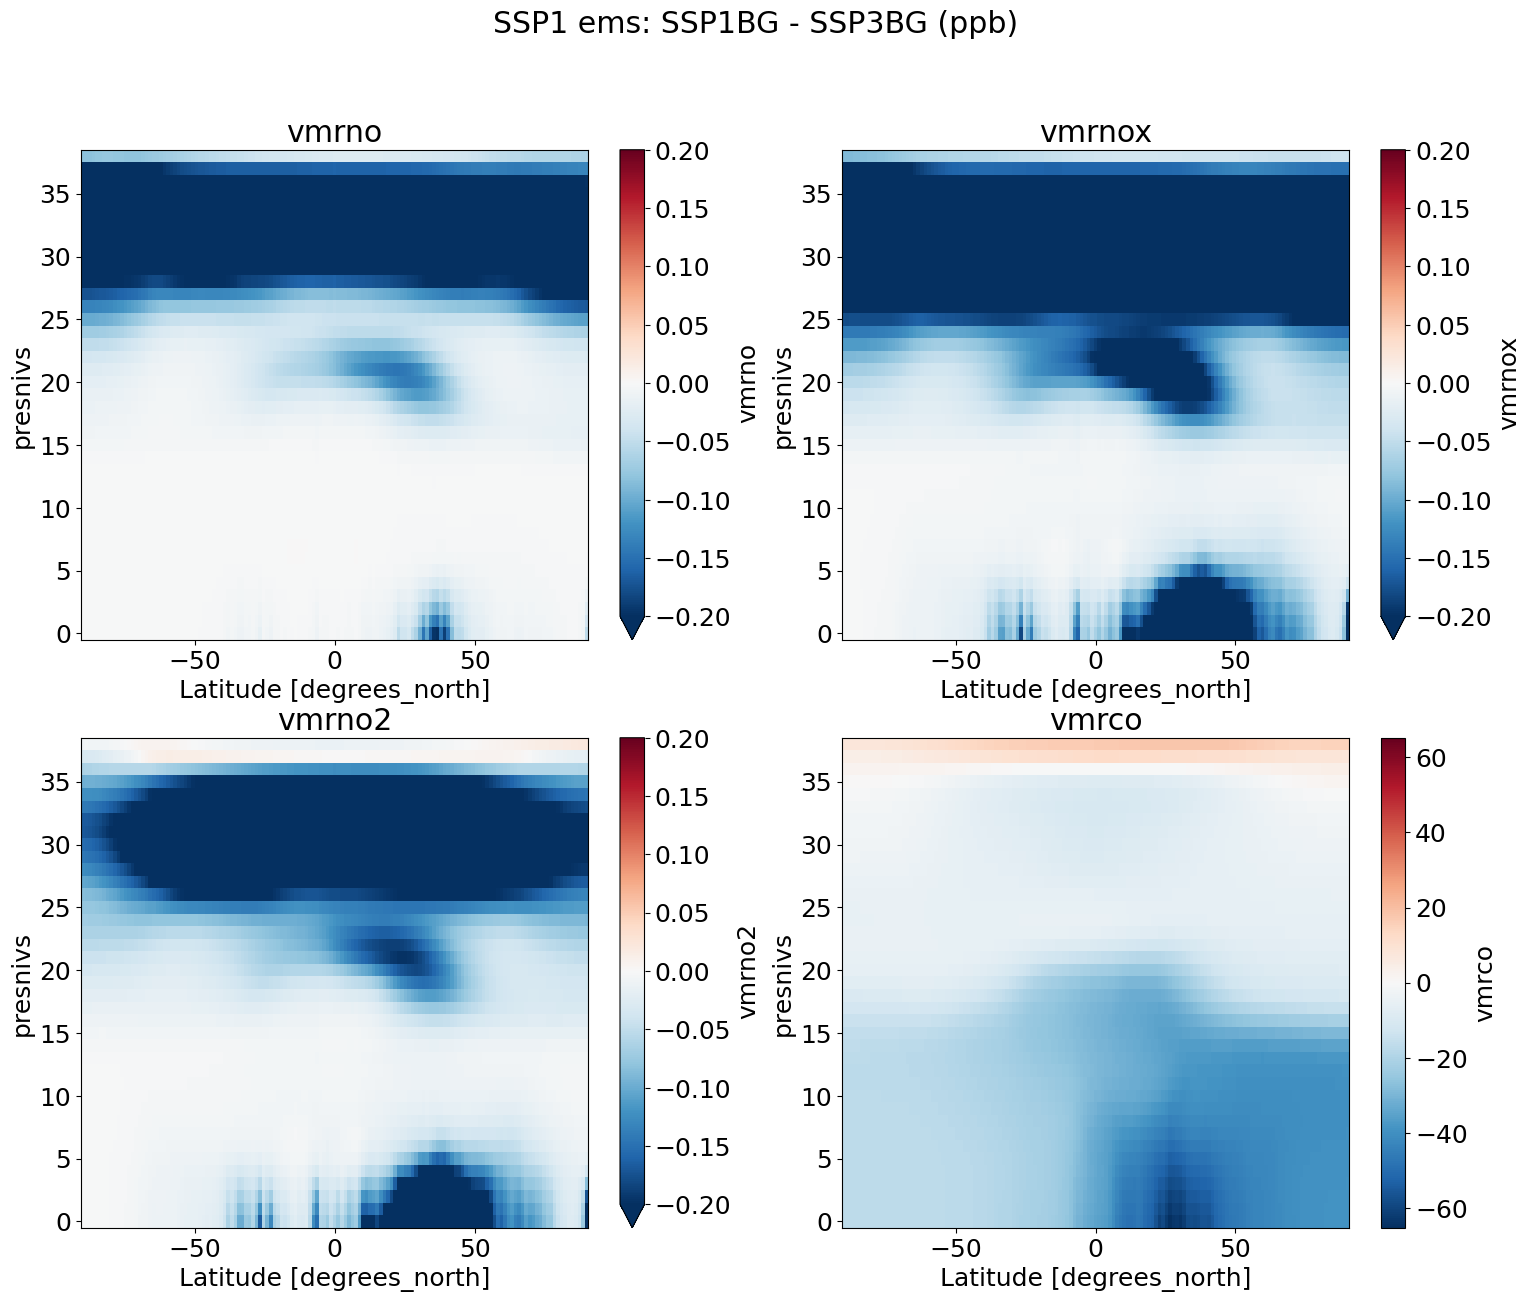

In [5]:
vars = ["vmrno","vmrnox","vmrno2","vmrco"]

f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize = (18,14))#,sharey=True)
(ds_diff_SSP1[vars[0]]*1e9).mean(dim=["time_counter","lon"],keep_attrs=True).plot(ax=ax1,cmap = 'RdBu_r',vmax=0.2,vmin=-0.2)
ax1.set_title(vars[0])
(ds_diff_SSP1[vars[1]]*1e9).mean(dim=["time_counter","lon"],keep_attrs=True).plot(ax=ax2,cmap = 'RdBu_r',vmax=0.2,vmin=-0.2)
ax2.set_title(vars[1])
(ds_diff_SSP1[vars[2]]*1e9).mean(dim=["time_counter","lon"],keep_attrs=True).plot(ax=ax3,cmap = 'RdBu_r',vmax=0.2,vmin=-0.2)
ax3.set_title(vars[2])
(ds_diff_SSP1[vars[3]]*1e9).mean(dim=["time_counter","lon"],keep_attrs=True).plot(ax=ax4,cmap = 'RdBu_r')#,vmax=80,vmin=-80)
ax4.set_title(vars[3])
plt.suptitle('SSP1 ems: SSP1BG - SSP3BG (ppb)')

### Add tropopause and plot NOx

In [6]:
#zonal mean o3 for tropopause
zon_mean_o3 = ds_SSP1['vmro3'].mean(dim=["time_counter","lon"],keep_attrs=True)*1e9

#first exceedance of 150ppb
indexes = np.array(zon_mean_o3.where(zon_mean_o3 > 125).argmin(dim='presnivs'))

#select lev for 150ppb index
trop_lev = np.take(ds_SSP1.lev, indexes)

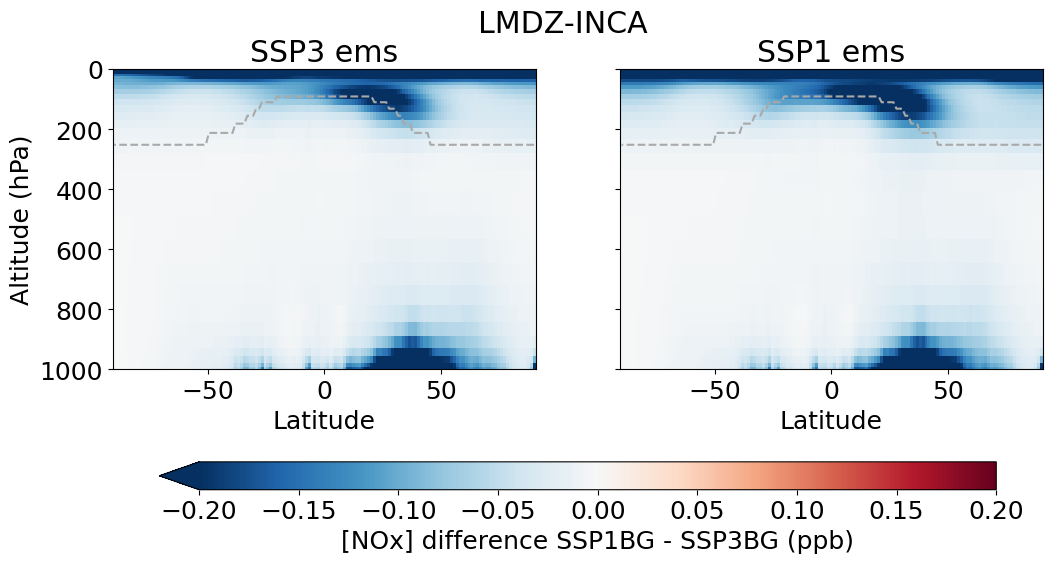

In [7]:
fig, ((ax1,ax2)) = plt.subplots(1,2, figsize = (12,6),sharey=True)

#im = (ds_diff_SSP3['vmrnox']*1e9).mean(dim=["time_counter","lon"],keep_attrs=True).plot(ax=ax1,y='lev',cmap = 'RdBu_r',vmax=0.2,vmin=-0.2,yincrease=False,
#                                                                           add_colorbar=False)

im = ax1.pcolormesh(ds_SSP1.lat,ds_SSP1.lev/100,
               (ds_diff_SSP3["vmrnox"]*1e9).mean(dim=["time_counter","lon"],keep_attrs=True),vmax=0.2,vmin=-0.2,cmap='RdBu_r')

ax1.set_title('SSP3 ems')
ax1.set_ylabel('Altitude (hPa)')
ax1.set_xlabel('Latitude')
ax1.set_ylim(100000, 0)

ax1.plot(ds_SSP1.lat,trop_lev/100,c='darkgrey',linewidth=1.5,linestyle='--')

ax2.pcolormesh(ds_SSP1.lat,ds_SSP1.lev/100,
               (ds_diff_SSP1["vmrnox"]*1e9).mean(dim=["time_counter","lon"],keep_attrs=True),vmax=0.2,vmin=-0.2,cmap='RdBu_r')


ax2.set_title('SSP1 ems')
ax2.set_ylabel('')
ax2.set_xlabel('Latitude')

ax1.set_ylim(1000, 0)
plt.suptitle('LMDZ-INCA')
ax2.plot(ds_SSP1.lat,trop_lev/100,c='darkgrey',linewidth=1.5,linestyle='--')





fig.colorbar(im, ax=[ax1, ax2], orientation='horizontal', label=f"[NOx] difference SSP1BG - SSP3BG (ppb)",aspect=30,extend='min',shrink=0.9,pad=0.20)